## Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

## Loading Dataset

In [108]:
df = pd.read_csv('house2.csv')

In [109]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8426,Super built-up Area,Ready To Move,Yelahanka,3 BHK,Niareum,2317,4.0,3.0,140.0
9276,Super built-up Area,Ready To Move,JP Nagar,3 BHK,DSillto,1450,2.0,2.0,55.0
6998,Super built-up Area,Ready To Move,Rayasandra,3 BHK,Amlisai,1179,2.0,1.0,55.0
7243,Built-up Area,Ready To Move,Jyothi Nagar,2 BHK,NaN,959,2.0,1.0,42.5
1665,Super built-up Area,19-Dec,Binny Pete,3 BHK,Shestlo,1282,3.0,2.0,178.0


In [110]:
df.shape

(13320, 9)

In [111]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Dropping categorical columns

In [112]:
df = df.drop(['area_type','location','availability','society'],axis = 1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13304 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


In [114]:
df['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

## Variation of Price and Correlation 

<Axes: xlabel='price', ylabel='Density'>

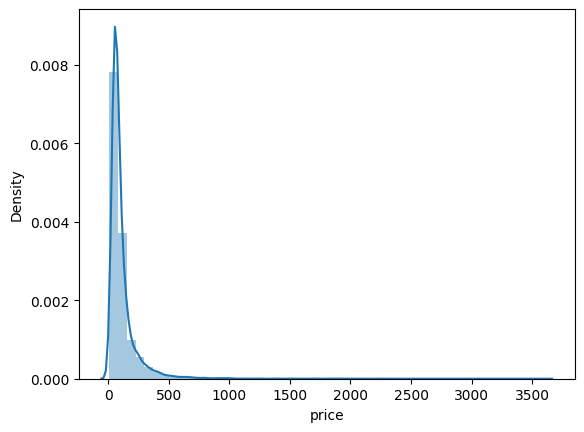

In [115]:
sns.distplot(df['price'])

<Axes: >

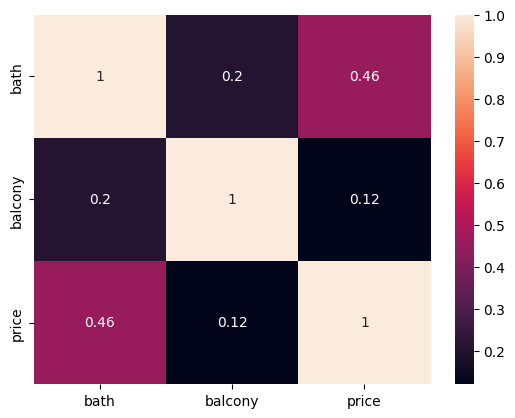

In [116]:
numericalColumns = ["bath","balcony","price"]
corr = df[numericalColumns].corr()
sns.heatmap(corr, annot=True)

Correlation of bath is more than balcony with price

## Data Cleaning

In [117]:
df.isnull().sum()

size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

### Cleaning 'size' column

In [118]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [119]:
df['size'].isnull().sum()

16

In [120]:
def changesize(val):
    if val == np.nan:
        return np.nan
    else:
        val = str(val).split(' ')
        val = val[0]
        return float(val)
    
df['size'] = df['size'].apply(changesize)

df['size'] = df['size'].fillna(df['size'].mean())


df['size'].isnull().sum()

0

In [121]:
df.isnull().sum()

size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

### Cleaning 'bath' column

In [122]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [123]:
# fill nan values with mean
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [124]:
df.isnull().sum()

size            0
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

### Cleaning 'balcony' column

In [125]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [126]:
# fill nan values with mean
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())

In [127]:
df.isnull().sum()

size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13320 non-null  float64
 1   total_sqft  13320 non-null  object 
 2   bath        13320 non-null  float64
 3   balcony     13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(4), object(1)
memory usage: 520.4+ KB


### Cleaning 'total_sqft' column

In [129]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [130]:
total_sqft_int = []

for val in df['total_sqft']:
    try:
        total_sqft_int.append(float(val))
    except:
        try:
            val = val.split('-')
            total_sqft_int.append((float(val[0]) + float(val[1])) / 2)  
        except:
            total_sqft_int.append(np.nan)  


In [131]:
# join new integer column
df = df.join(pd.DataFrame({'new_total_sqft':total_sqft_int}))

In [132]:
# fill na values in total_sqft_int with mean 
df['new_total_sqft'] = df['new_total_sqft'].fillna(df['new_total_sqft'].mean())

In [133]:
# dropping old total_sqft
df = df.drop(['total_sqft'],axis = 1)

In [134]:
df.sample(5)

,size,bath,balcony,price,new_total_sqft
2459,7.0,6.0,1.584376,85.00,700.0
5814,1.0,1.0,1.000000,50.00,905.0
4132,2.0,2.0,1.000000,88.73,1251.0
8437,2.0,2.0,1.000000,47.00,957.0
5413,2.0,2.0,1.000000,47.00,1125.0


In [135]:
# ALl columns are Numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            13320 non-null  float64
 1   bath            13320 non-null  float64
 2   balcony         13320 non-null  float64
 3   price           13320 non-null  float64
 4   new_total_sqft  13320 non-null  float64
dtypes: float64(5)
memory usage: 520.4 KB


In [136]:
# No null values
df.isnull().sum()

size              0
bath              0
balcony           0
price             0
new_total_sqft    0
dtype: int64

# Model Implementation

In [137]:
df.sample(5)


,size,bath,balcony,price,new_total_sqft
5256,2.0,2.0,1.0,43.66,999.0
6966,3.0,2.0,1.0,77.50,1500.0
3257,2.0,2.0,1.0,46.00,1070.0
10576,1.0,1.0,1.0,27.00,550.0
315,5.0,5.0,2.0,180.00,1200.0


In [138]:
x=df.drop(columns=['price'])
y=df['price']
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [139]:
x = np.array(x)
x


array([[2.000e+00, 2.000e+00, 1.000e+00, 1.056e+03],
       [4.000e+00, 5.000e+00, 3.000e+00, 2.600e+03],
       [3.000e+00, 2.000e+00, 3.000e+00, 1.440e+03],
       ...,
       [2.000e+00, 2.000e+00, 1.000e+00, 1.141e+03],
       [4.000e+00, 4.000e+00, 1.000e+00, 4.689e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 5.500e+02]])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:


    model = keras.Sequential([
        keras.layers.Input(shape=(4,)),        
        keras.layers.Dense(64, activation='relu'),  
        keras.layers.Dense(32, activation='relu'),  
        keras.layers.Dense(1)                   
])


    


In [142]:
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
    

In [143]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
267/267 [==============================] - 1s 1ms/step - loss: 6.0957 - val_loss: 1.6174
Epoch 2/100
267/267 [==============================] - 0s 894us/step - loss: 0.8975 - val_loss: 0.5191
Epoch 3/100
267/267 [==============================] - 0s 883us/step - loss: 0.3985 - val_loss: 0.3183
Epoch 4/100
267/267 [==============================] - 0s 896us/step - loss: 0.2868 - val_loss: 0.2560
Epoch 5/100
267/267 [==============================] - 0s 909us/step - loss: 0.2454 - val_loss: 0.2273
Epoch 6/100
267/267 [==============================] - 0s 889us/step - loss: 0.2217 - val_loss: 0.2078
Epoch 7/100
267/267 [==============================] - 0s 901us/step - loss: 0.2022 - val_loss: 0.1917
Epoch 8/100
267/267 [==============================] - 0s 898us/step - loss: 0.1866 - val_loss: 0.1802
Epoch 9/100
267/267 [==============================] - 0s 901us/step - loss: 0.1756 - val_loss: 0.1729
Epoch 10/100
267/267 [==============================] - 0s 905us/step - los

In [144]:
model.evaluate(X_test, y_test)



84/84 [==============================] - 0s 662us/step - loss: 0.1367


0.13674192130565643

In [ ]:
bed = float(input("enter no of bedrooms"))
bath = float(input("enter no. of bathrooms"))
balcony = float(input("enter no. of balconys"))
new_total_sqft = float(input("enter total sqft"))


new_data = np.array([[bed, bath,balcony, new_total_sqft]])  
scaled_new_data = scaler.transform(new_data)
predicted_price = model.predict(scaled_new_data)
print(f"Predicted Price: {predicted_price[0][0]:.2f} lakhs")